In [ ]:
#uisng physical measurements to predict the age of abalone

In [1]:
import pandas as pd
url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(url, header=None)

In [2]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
#adding column names to the dataset
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
                  'Shucked weight', 'Viscera weight', 'Shell weight', 'Ring']

In [5]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ring
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
#drop the sex column as we shall be requiring only the physical measurements to predict the age

abalone = abalone.drop('Sex', axis=1)

In [7]:
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ring
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
#descriptive statistics of the dataset
import matplotlib.pyplot as plt

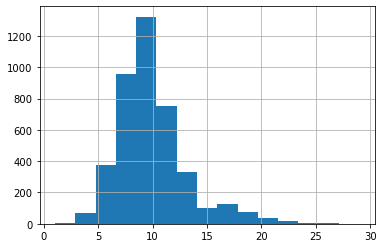

In [13]:
abalone['Ring'].hist(bins=15)
plt.show()

In [18]:
#checking for the correlation of the other varibles with the target varable.
#the closer they are to 1, the more correlation there is

correlation_matrix = abalone.corr()
correlation_matrix['Ring']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Ring              1.000000
Name: Ring, dtype: float64

In [17]:
abalone.values

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]])

In [15]:
#step by step KNN

#create the independent variables and dependent variable
X = abalone.drop('Ring', axis=1)
X = X.values

y = abalone['Ring']
y = y.values 

In [19]:
#using k=3 on abalone correlation; creating a new numpy array

import numpy as np

In [20]:
new_data_point = np.array([
    0.556720,
    0.574660,
    0.557467,
    0.540390,
    0.420884,
    0.503819,
    0.627574,
])

In [25]:
#compute the distances between the new_data_point and each of the data points in the abalone dataset

distances = np.linalg.norm(X - new_data_point, axis=1)
distances

array([0.83533417, 1.03816926, 0.74460697, ..., 0.83660283, 0.81657592,
       1.56430346])

In [24]:
#finding out the 3 nearest neighbors. to do this, you need to find the IDs of he min distances using argsort()

k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([3034,  506, 1637], dtype=int64)

In [26]:
#averaging of multiple neighbors; combine those neghbors into a prediction for your new data point

nearest_neighbor_ring = y[nearest_neighbor_ids]
nearest_neighbor_ring

array([10, 12,  8], dtype=int64)

In [28]:
#prediction for regression

prediction = nearest_neighbor_ring.mean()
prediction

10.0

In [30]:
#fitting a kNN regression to the abalone dataset

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [32]:
#splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)

In [33]:
#model
knn_mod = KNeighborsRegressor(n_neighbors=3)

In [34]:
#fit the model on the training dataset

knn_mod.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [35]:
#inspect model fit using RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

In [36]:
#training the model
train_pred = knn_mod.predict(X_train)
mse = mean_squared_error(y_train, train_pred)
rmse = sqrt(mse)
rmse

1.6538366794859511

In [37]:
#testing the model

test_pred = knn_mod.predict(X_test)
mse = mean_squared_error(y_test, test_pred)
rmse = sqrt(mse)
rmse

2.375417924000521

In [ ]:
#from the above prediction of both the test and train data, the model suffers from overftting on the training data: 
#it does not generalize well

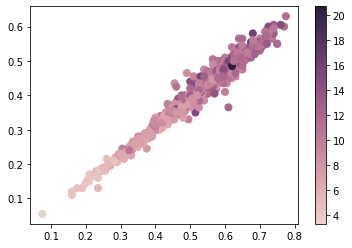

In [39]:
#plotting the model

import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(X_test[:,0], X_test[:,1], c=test_pred, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [41]:
#KNN TUNING

#improving KNN performance in scikit-learn using GridSearchCV - step one
#to find the best value for k, use the above tool.

from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [42]:
#retaining the best performance value of k

gridsearch.best_params_

{'n_neighbors': 25}

In [44]:
#using the above value of k on the model

train_pred_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred_grid)
train_rmse = sqrt(train_mse)

test_pred_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred_grid)
test_rmse = sqrt(test_mse)

print('train rmse:', train_rmse, sep='\n')
print('test rmse:', test_rmse, sep='\n')

train rmse:
2.0731180327543384
test rmse:
2.1700197339962175


In [47]:
#further reducing the test error - step 2

parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [48]:
test_pred_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1634265584947485

In [71]:
#using bagging - step 3

best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(
n_neighbors=best_k, weights=best_weights
)

from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)
bagging_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=25,
                                                    weights='distance'),
                 n_estimators=100)

In [72]:
#fit into the model
test_pred_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.158243927625997

In [ ]:
#NOTE: from above
#the model with a random k performed the worse; the model with bagging and GridSearchCV performed the best